# **Text Classification**

## Sentiment Analysis on Movie Reviews   😀-😢
* Sentiment analysis, is a text classification technique that is used to determine the sentiment or emotional tone expressed in a piece of text, such as a review, comment, or social media post
* Example:
  
  "I gave this film my rare 10 stars" -Positive(1)

  "It was such an awful movie experience" -Negative(0)

* Sentiment analysis typically involves machine learning models trained on labeled datasets, where each piece of text is associated with a sentiment label. These models use various NLP techniques, such as tokenization, word embeddings, and deep learning architectures like recurrent neural networks (RNNs) or transformer models like BERT, to analyze and classify sentiment in text.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Incorporating GloVe Word Embedding**

Global vectors for word representation

In [ ]:
#using pretrained embedding
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-09-23 08:34:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-09-23 08:34:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-09-23 08:34:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
print('Indexing word vectors-100d.')

embeddings_index_100d = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_100d[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_100d))

Indexing word vectors-100d.
Found 400000 word vectors.


In [ ]:
#example for two random words
word1_embedding=embeddings_index_100d['movie']
print("Size of the embedding:",word1_embedding.shape,"\n")
word1_embedding

Size of the embedding: (100,) 



array([ 0.38251  ,  0.14821  ,  0.60601  , -0.51533  ,  0.43992  ,
        0.061053 , -0.62716  , -0.025385 ,  0.1643   , -0.22101  ,
        0.14423  , -0.37213  , -0.21683  , -0.08895  ,  0.097904 ,
        0.6561   ,  0.64455  ,  0.47698  ,  0.83849  ,  1.6486   ,
        0.88922  , -0.1181   , -0.012465 , -0.52082  ,  0.77854  ,
        0.48723  , -0.014991 , -0.14127  , -0.34747  , -0.29595  ,
        0.1028   ,  0.57191  , -0.045594 ,  0.026443 ,  0.53816  ,
        0.32257  ,  0.40788  , -0.043599 , -0.146    , -0.48346  ,
        0.32036  ,  0.55086  , -0.76259  ,  0.43269  ,  0.61753  ,
       -0.36503  , -0.60599  , -0.79615  ,  0.3929   , -0.23668  ,
       -0.34719  , -0.61201  ,  0.54747  ,  0.94812  ,  0.20941  ,
       -2.7771   , -0.6022   ,  0.8495   ,  1.2549   ,  0.017893 ,
       -0.041901 ,  2.1147   , -0.026618 , -0.28104  ,  0.68124  ,
       -0.14165  ,  0.99249  ,  0.49879  , -0.67538  ,  0.6417   ,
        0.42303  , -0.27913  ,  0.063403 ,  0.68909  , -0.3618

In [ ]:
#sample word embedding
wordlist = ["bad","Excellent", "Terrible", "Outstanding", "Mediocre", "Superb", "Awful", "worst","nice"]

word_embedding_array =[]

for word in wordlist:
    rep=  embeddings_index_100d[word.lower()]
    word_embedding_array.append(rep)


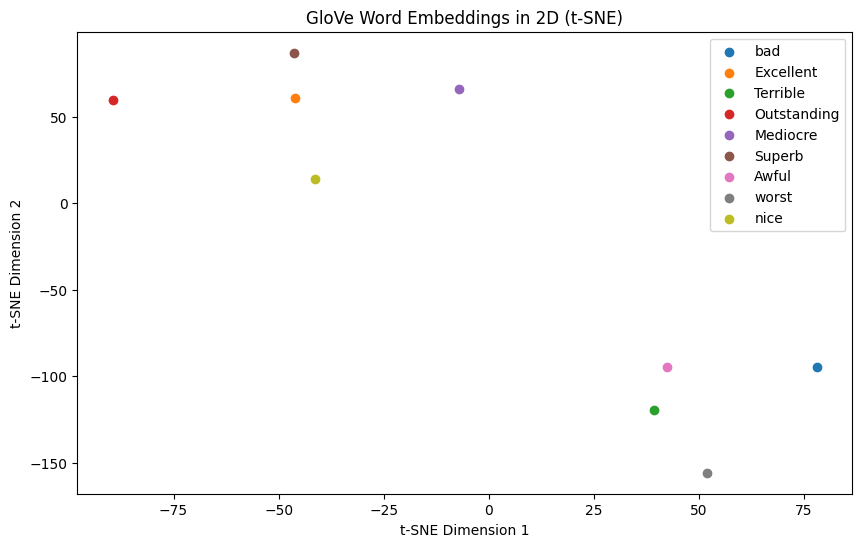

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, perplexity=2, random_state=42)

# Convert the list of word embeddings to a NumPy array
word_embedding = np.array(word_embedding_array)  # Replace 'word_embedding_list' with your list

# Apply t-SNE to the entire embedding array
tsne_results = tsne.fit_transform(word_embedding)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(wordlist):
    plt.scatter(tsne_results[i, 0], tsne_results[i, 1], label=word)

plt.title("GloVe Word Embeddings in 2D (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


# **Cosine Similarity**

Cosine Similarity(Angle) is a commonly used similariry score

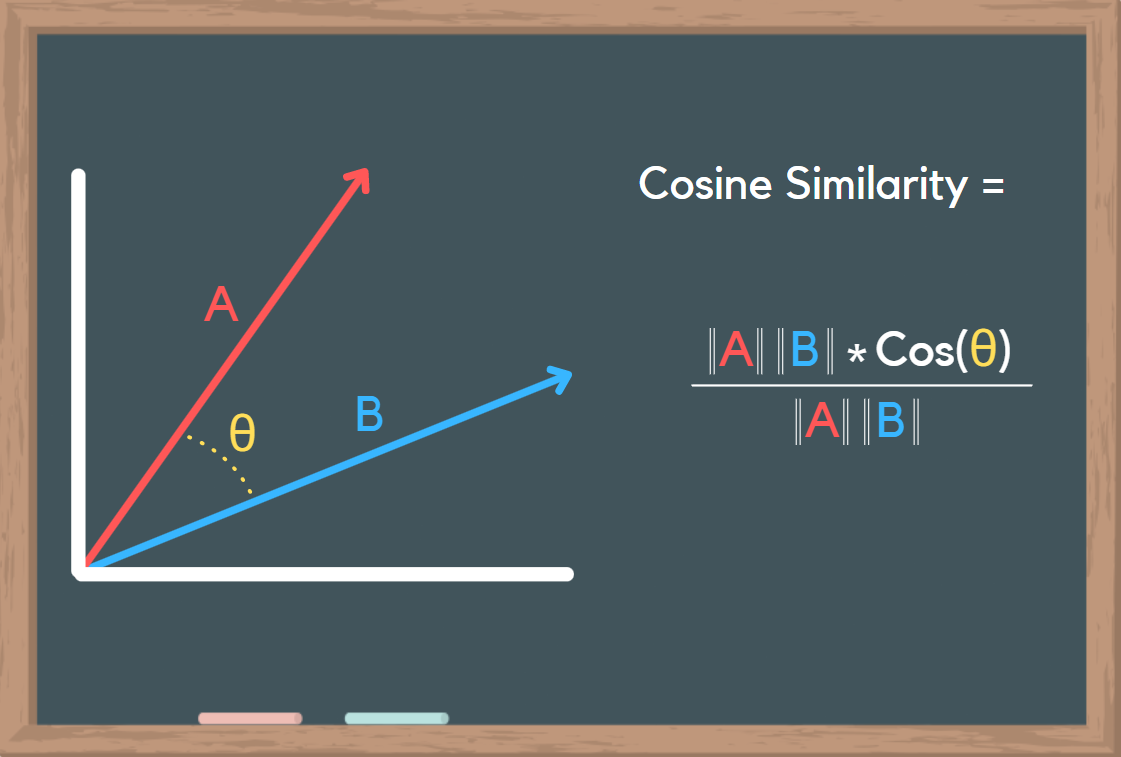

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Semester 3/Transformers Tutorial/cosine_sim.png", width =700)

In [ ]:
def cosine_similarity_calc(vec_1,vec_2):
	sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))
	return sim

In [ ]:
#example cosine similarity

word1= "movie"
word2="film"

print(f"Cosine similarity between {word1} and {word2} (100d):",
      cosine_similarity_calc(embeddings_index_100d[word1], embeddings_index_100d[word2]))

Cosine similarity between movie and film (100d): 0.90551215


In [ ]:
import numpy as np
print('Indexing word vectors-300d.')

embeddings_index_300d = {}
f = open('glove.6B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_300d[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_300d))

Indexing word vectors-300d.
Found 400000 word vectors.


In [ ]:
print(f"Cosine similarity between {word1} and {word2} (300d):",
      cosine_similarity_calc(embeddings_index_300d[word1], embeddings_index_300d[word2]))

Cosine similarity between movie and film (300d): 0.85887855


# **Text Classification**


* Example:
  
  "I gave this film my rare 10 stars" -Positive(1)

  "It was such an awful movie experience" -Negative(0)


# Data Preprocessing
- Convert into lower case : Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
- Remove Punctuations: Removing punctuation from the text like ".?!" and also the symbols like "@#$" .
- Tokenise: Split the text sentence into tokens.
- Stop word Removal: Remove irrelevant words using nltk stop words like "is,the,a" etc from the sentences as they don't provide much information to the query.




In [ ]:
#Installing and importing the basic packages required.
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([word for word in text if word not in string.punctuation])
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# For data manipulation and analysis
import pandas as pd
data =  pd.read_csv('/content/drive/MyDrive/Semester 3/Transformers Tutorial/IMDB Dataset.csv')
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
#  Creating labels based on the 'sentiment' column, where 'positive' is mapped to 1 and 'negative' to 0
data['labels'] = [1 if sentiment == "positive" else 0 for sentiment in data['sentiment'].tolist()]
data

,review,sentiment,labels
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [ ]:
# For data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['labels'], test_size=0.2, random_state=42)

In [ ]:
# Apply vectorization to both training and testing data
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [ ]:
#function to find unique words
import re
def find_unique_words(preprocessed):
  word_list=[]
  words = re.findall(r'\w+', preprocessed)
  for word in words:
    if word not in word_list:
        word_list.append(word)
  return word_list

In [ ]:
#function for embedding the review texts
embedding_dim = 100
def paragraph_embedding(text):
  wordlist_doc = find_unique_words(text)
  num_tokens = len(wordlist_doc)
  embedding_matrix=np.zeros((num_tokens, embedding_dim))
  for i in range(0,len(wordlist_doc)):
    try:
      embedding_matrix[i]=embeddings_index_100d[wordlist_doc[i]]
    except:
      pass
  words_vecs = np.array(embedding_matrix)
  return words_vecs.mean(axis=0)

In [ ]:
X_train = np.array([paragraph_embedding(review) for review in X_train])
X_test = np.array([paragraph_embedding(review) for review in X_test])

In [ ]:
X_train[0]

array([-2.05101476e-02,  1.75325713e-01,  2.06264738e-01, -1.75695004e-01,
       -3.37341379e-02,  1.86870000e-01, -1.77933023e-01,  4.57873296e-02,
        2.36135217e-02, -5.67418160e-02,  7.35544228e-02,  1.31376125e-02,
        1.44131909e-01, -2.89035801e-02,  8.72284355e-02, -1.14462267e-01,
       -2.13784896e-02,  1.30350158e-01, -1.73860846e-01,  3.04263378e-01,
        1.57468839e-01, -8.84160567e-03,  4.58512758e-02, -2.14730165e-01,
        1.01160957e-01, -4.39784268e-03, -8.39585521e-02, -1.95899903e-01,
        1.04347366e-01, -1.06701521e-01, -6.87273328e-02,  2.86400632e-01,
       -3.82397106e-02, -1.49061005e-02,  3.20085979e-02,  1.31208073e-01,
       -6.76901539e-02,  2.77691324e-02, -4.12397283e-02, -1.23231126e-01,
       -1.16608046e-01, -6.65718580e-04,  1.54058121e-02, -1.24792609e-01,
       -8.37769036e-02, -4.95022940e-02,  6.37446788e-02, -1.15331751e-01,
        1.56845024e-02, -4.83691444e-01,  3.08600457e-02, -9.45727928e-02,
        1.29287669e-01,  

In [ ]:
#classification using Logistic Regression, provided by sklearn

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label=1))
print('Recall:', recall_score(y_test, y_pred, pos_label=1))
print('F1 score:', f1_score(y_test, y_pred, pos_label=1))

Accuracy: 0.7999
Precision: 0.8048976314733038
Recall: 0.7957928160349276
F1 score: 0.8003193294082427


In [ ]:
text = "Finally, an indie film that actually delivers some great scares!"
pre_text = preprocess(text)
embed = paragraph_embedding(pre_text)
clf.predict(embed.reshape(1, -1))


array([1])


**References**


- https://nlp.stanford.edu/projects/glove/
- https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/nlp/ipynb/pretrained_word_embeddings.ipynb#scrollTo=wa65QiH-uINO
-https://www.kaggle.com/code/jannesklaas/17-nlp-and-word-embeddings
- https://towardsdatascience.com/a-guide-to-word-embeddings-8a23817ab60f